# <span style="color:forestgreen">Analyses exploratoires pour la région Grand-Est</span> 

### <span style="color:olivedrab">Partie I - Exploration des données</span> 

- <span style="color:steelblue">Importation librairie</span>

In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
library(tidyr)
library(stats)
library(pheatmap)
library(corrplot)
library(sf)
library(Hmisc)
library(leaflet)

Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'pheatmap' was built under R version 3.6.3"
Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.88 loaded

Warning message:
"package 'sf' was built under R version 3.6.3"
Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version

- <span style="color:steelblue">Importation données </span>

In [2]:
UDI_PLV_2021 <- read.csv("UDI_PLV_2021.txt", sep=",")
UDI_RES_2021 <- read.csv("UDI_RES_2021.txt", sep=",")

- <span style="color:steelblue"> Traitement et analyse du fichier UDI_RES_2021</span>

In [3]:
#aperçu du contenu du fichier
UDI_RES_2021[sample(nrow(UDI_RES_2021), 5), ]

,cddept,referenceprel,cdanalyse,refechantillonlabo,datereceptionechant,cdlaboratoire,laboratoire,cdtypeanalyse,analysecdorganisme,analysedate,⋯,cdparametre,cdparametresiseeaux,rqana,rssigne,rsana,cdunitereferencesiseeaux,cdunitereference,cdfractionanalyse,sandrelaboratoire,representativite
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,⋯,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<int>,<dbl>,<fct>
2738869,047,04700075179,04700075237,21110803349401,2021-11-09,3101,2.231000e+13,047D1B,04700320,2021-11-17,⋯,6455,STRF,0,,0.00,n/(100mL),226,NA,2.270000e+02,O
950526,017,01700127632,01700127581,21LH-12640-1,2021-11-19,1701,2.000132e+13,017D1,01700013,2021-11-19,⋯,5900,COULQ,0,,0.00,SANS OBJET,X,NA,2.000132e+13,O
3631544,062,06200255220,06200254912,LSE2108-22311,2021-08-05,6901,4.105453e+13,062D1_4,06201005,2021-08-05,⋯,1295,TURBNFU,"<0,1",<,0.00,NFU,232,NA,2.170000e+02,O
2166999,035,03500154055,,,,,NA,,,,⋯,1399,CL2TOT,"0,28",,0.28,mg(Cl2)/L,165,NA,NA,O
3910758,068,06800152809,06800152774,CAN2105-1363,2021-05-18,6703,7.788520e+13,068D1AS,06800381,2021-05-18,⋯,1447,CTF,<1,<,0.00,n/(100mL),226,NA,NA,O


In [29]:
#aperçu des différents nom de colonne
print(names(UDI_RES_2021))

[1] "cddept"                   "referenceprel"           
[3] "cdparametre"              "cdparametresiseeaux"     
[5] "rsana"                    "cdunitereferencesiseeaux"


In [5]:
# Supprimer les colonnes inutiles
UDI_RES_2021 <- subset(UDI_RES_2021, select = -c(cdanalyse, refechantillonlabo, datereceptionechant,cdtypeanalyse,analysecdorganisme,
                 analysedate,insituana,rqana,rssigne,cdunitereference,cdfractionanalyse,sandrelaboratoire,
                representativite,laboratoire,cdlaboratoire))
head(UDI_RES_2021)

,cddept,referenceprel,cdparametre,cdparametresiseeaux,rsana,cdunitereferencesiseeaux
,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>
1,001,00100123497,1453,ACPT,0,Âµg/L
2,001,00100123497,1457,ACRYL,0,Âµg/L
3,001,00100123497,1458,ANTHRA,0,Âµg/L
4,001,00100123497,6489,ASP,0,SANS OBJET
5,001,00100123497,1115,BAPYR,0,Âµg/L
6,001,00100123497,1116,BBFLUO,0,Âµg/L


In [30]:
#listes des départements
print(unique(UDI_RES_2021$cddept))

  [1] 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 016 017 018
 [19] 019 021 022 023 024 025 026 027 028 029 02A 02B 030 031 032 033 034 035
 [37] 036 037 038 039 040 041 042 043 044 045 046 047 048 049 050 051 052 053
 [55] 054 055 056 057 058 059 060 061 062 063 064 065 066 067 068 069 070 071
 [73] 072 073 074 075 076 077 078 079 080 081 082 083 084 085 086 087 088 089
 [91] 090 091 092 093 094 095 971 972 973 974 976
101 Levels: 001 002 003 004 005 006 007 008 009 010 011 012 013 014 015 ... 976


Les 10 départements dans la région Grand Est:
- Ardennes (08)
- Aube (10)
- Bas-Rhin (67)
- Haut-Rhin (68)
- Haute-Marne (52)
- Marne (51)
- Meurthe-et-Moselle (54)
- Meuse (55)
- Moselle (57)
- Vosges (88)


In [7]:
# sélectionner les départements de la Région Grand Est:
DPT_Grand_Est <- c("008", "010", "067", "068", "052", "051", "054", "055", "057", "088")
UDI_RES_2021_Grand_Est <- subset(UDI_RES_2021, cddept %in% DPT_Grand_Est)
print("les dimensions du fichier RES Grand_Est")
print(dim(UDI_RES_2021_Grand_Est))

[1] "les dimensions du fichier RES Grand_Est"
[1] 761117      6


In [8]:
#regarder le nombres de valeurs manquantes sur chaque colonne:
print(colSums(is.na(UDI_RES_2021_Grand_Est)))

                  cddept            referenceprel              cdparametre 
                       0                        0                       57 
     cdparametresiseeaux                    rsana cdunitereferencesiseeaux 
                     151                      738                        0 


- <span style="color:steelblue">Traitement et analyse du fichier UDI_PLV_2021 </span>

In [9]:
#aperçu du contenu du fichier
UDI_PLV_2021[sample(nrow(UDI_PLV_2021), 5), ]

,distrcode,distrlib,distrsiret,cddept,inseecommune,nomcommune,cdreseau,nomreseau,codetypeinstallation,nomtypeinstallation,⋯,dtautorisation,champcaptant,codebrgm,codebss,dmajplv,dmodifplv,dmodifins,representativite,coord_x,coord_y
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
36780,01500105,MAIRIE DE LIEUTADES,,015,15106,LIEUTADES,015001340,LA PADELLE,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2021-01-26,2021-01-27,2019-12-05,O,NA,NA
218235,09400192,VEOLIA EAU D'ILE DE FRANCE,52433494300015,094,94081,VITRY-SUR-SEINE,094000081,G.CHOISY MAJORITAIRE,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2021-04-08,2021-04-09,2021-06-14,O,654247.8,6853017
34428,01400710,SAUR CENTRE NORMANDIE,33937998400133,014,14237,EMIEVILLE,014000686,CLOS MORANT,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2021-11-19,2021-11-22,2019-10-16,O,464932.0,6899637
166911,07100626,SUEZ (S.D.E.I.) CENTRE DE CHARNAY,41003460703064,071,71318,MONTPONT-EN-BRESSE,071000865,BASSE SEILLE,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2021-07-13,2021-07-14,2021-09-21,O,865726.7,6608391
129335,05700855,VEOLIA EAU REGION EST,57202552610945,057,57360,KERBACH,057001801,FORBACH 5 SUD,UDI,UNITE DE DISTRIBUTION,⋯,NA,NA,NA,NA,2021-02-22,2021-02-23,2022-03-22,O,NA,NA


In [31]:
#aperçu des différents nom de colonne
print(names(UDI_PLV_2021))

 [1] "distrlib"      "cddept"        "inseecommune"  "nomcommune"   
 [5] "cdreseau"      "nomreseau"     "referenceprel" "dateprel"     
 [9] "coord_x"       "coord_y"      


In [11]:
# Supprimer les colonnes inutiles
UDI_PLV_2021 <- subset(UDI_PLV_2021, select = -c(distrcode, distrcode, distrsiret,codetypeinstallation,nomtypeinstallation,
                                                inae,cdpointsurv,nompointsurv,heureprel,finaliteprel,conclusionprel,cdtypeeau,libtypeeau,
                                                plvconformitebacterio,plvconformitechimique,plvcomplet,plvcdorganismepayeur,typevisite,
                                                plvcondition,preleveur,distrsiren,plvconformiterefbacterio,plvconformiterefchimique,
                                                cddeptsandre,dtautorisation,champcaptant,codebrgm,codebss,dmajplv,dmodifplv,dmodifins,representativite))
head(UDI_PLV_2021)

,distrlib,cddept,inseecommune,nomcommune,cdreseau,nomreseau,referenceprel,dateprel,coord_x,coord_y
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,SAUR FRANCE CHALON-SUR-SAONE,001,01001,ABERGEMENT-CLEMENCIAT (L'),001000556,BDS ST DIDIER/CHALARONNE,00100125261,2021-04-29,848228.7,6562950
2,SAUR FRANCE CHALON-SUR-SAONE,001,01001,ABERGEMENT-CLEMENCIAT (L'),001000556,BDS ST DIDIER/CHALARONNE,00100128476,2021-11-18,848238.5,6563025
3,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100124232,2021-01-27,887371.7,6548843
4,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100125741,2021-05-25,887566.6,6548040
5,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100127979,2021-10-01,887501.6,6548137
6,MAIRIE DE L'ABERGEMENT-DE-VAREY,001,01002,ABERGEMENT-DE-VAREY (L'),001000369,L'ABERGEMENT-DE-VAREY,00100128353,2021-10-20,889137.3,6545792


In [12]:
# sélectionner les départements de la Région Grand Est:
DPT_Grand_Est <- c("008", "010", "067", "068", "052", "051", "054", "055", "057", "088")
UDI_PLV_2021_Grand_Est <- subset(UDI_PLV_2021, cddept %in% DPT_Grand_Est)
print("les dimensions du fichier PLV Grand_Est")
print(dim(UDI_PLV_2021_Grand_Est))

[1] "les dimensions du fichier PLV Grand_Est"
[1] 25486    10


In [13]:
#regarder le nombres de valeurs manquantes sur chaque colonne:
print(colSums(is.na(UDI_PLV_2021_Grand_Est)))

     distrlib        cddept  inseecommune    nomcommune      cdreseau 
            0             0             0             0             0 
    nomreseau referenceprel      dateprel       coord_x       coord_y 
            0             0             0         17283         17283 


 <span style="color:indianred">Attention, 68% des données du Grand_Est n'ont pas de coordonnées x et y.</span> 


### <span style="color:olivedrab">Partie II - Jointure</span> 

In [14]:
Fichier_GrandEst<- merge(UDI_PLV_2021_Grand_Est, UDI_RES_2021_Grand_Est, by = "referenceprel")

print("les dimensions du fichier Grand_Est après jointure")
print(dim(Fichier_GrandEst))
Fichier_GrandEst[sample(nrow(Fichier_GrandEst), 5), ]

[1] "les dimensions du fichier Grand_Est après jointure"
[1] 761117     15


,referenceprel,distrlib,cddept.x,inseecommune,nomcommune,cdreseau,nomreseau,dateprel,coord_x,coord_y,cddept.y,cdparametre,cdparametresiseeaux,rsana,cdunitereferencesiseeaux
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<fct>
423229,05200087606,SAUR RHIN RHONE,052,52093,CHALINDREY,052001670,CHALINDREY,2021-06-07,881948,6747635,052,1398,CL2LIB,0.1,mg(Cl2)/L
367957,05100126700,VEOLIA EAU,051,51167,COOLE,051000515,COOLE,2021-11-09,NA,NA,051,7086,TEMBO,0.0,Âµg/L
581711,05700151039,VEOLIA EAU REGION EST,057,57091,BLIESBRUCK,057000130,BLIESBRUCK,2021-09-22,1004917,6898588,057,1494,EPICL,0.0,Âµg/L
329219,05100125935,SUEZ-EAU-FRANCE,051,51609,VERNEUIL,051000775,CCPC VERNEUIL,2021-09-07,NA,NA,051,5646,HYMEX,0.0,Âµg/L
748812,08800167662,SUEZ EAU FRANCE SAS,088,88136,DOGNEVILLE,088001253,DOGNEVILLE,2021-09-17,NA,NA,088,5441,GT36_44,0.0,n/mL


In [15]:
#regarder le nombres de valeurs manquantes sur chaque colonne:
print(colSums(is.na(Fichier_GrandEst)))

           referenceprel                 distrlib                 cddept.x 
                       0                        0                        0 
            inseecommune               nomcommune                 cdreseau 
                       0                        0                        0 
               nomreseau                 dateprel                  coord_x 
                       0                        0                   606067 
                 coord_y                 cddept.y              cdparametre 
                  606067                        0                       57 
     cdparametresiseeaux                    rsana cdunitereferencesiseeaux 
                     151                      738                        0 


 <span style="color:indianred">Attention, 80% des données du Grand_Est n'ont pas de coordonnées x et y après jointure</span> 


### <span style="color:olivedrab">Partie III - Séléction du paramètre NO3 et NO3_NO2 (nitrate et nitrite combiné) </span> 

In [32]:
#listes des paramètres
print(unique(Fichier_GrandEst$cdparametresiseeaux))

  [1] ASP     CTF     BSIR    GT36_44 COULQ   CDT25   ODQ     PH      CL2TOT 
 [10] TEMP_PH TURBNFU STRF    TEAU    ECOLI   GT22_68 CL2LIB  NH4     NO3    
 [19] MN      PSA100  FET     CL      TA      CO3     SO4     <NA>    MG     
 [28] CA      ALTMICR NO2     TAC     ACTRN22 K       HCO3    CALCOC2 CO2A   
 [37] CO2     PHE     SMZ     GFST    DIAZ    OXALCL  QUINOXY IMAZAPY DFF    
 [46] IMBCAZ  IMAZAQU INDOXAC FNP     DCPADH  DAMZD   FNUR    DICHLB  DICOUM 
 [55] ODX     FPRO    DEHAME  FPPMP   DFB     SITN    PYRAZXF DCLORMI HEPTENO
 [64] IALDR   AMPA    DICRO   DILONE  PYRX    IMAZ    DIM2ESA FORASUL DIFENOC
 [73] SHYD    SCT     DDD24   SEBUT2H MOL     QUINO   GPST    FONO    BFNX   
 [82] HCHE    CYHABU  HEPEC   OXDM    TECNAZ  SEDAX   SEBUT   HXCZ    FNFS   
 [91] BROMADI DCHLOPH HCHG    DCAMB   TCVP    PZP     ALLYXY  ORZ     QUIZO  
[100] FURALAX SETHOX  SECB    DDE44   TCPY    DIM1ESA TCM     AMTH    FLUPYR 
[109] MIR     MLNR    IMAT    DITHIAN TEBUPI  DIFXUR  HYMEX   HX

In [17]:
#aperçu des données de Paris avec les paramètres THM4 et NO3: 1340, NO3_NO2:6374
NO3.N02.GrandEst.2021 <- subset(Fichier_GrandEst, cdparametresiseeaux == "NO3" | cdparametresiseeaux == "NO3_N2")
print("les dimensions du fichier avec les paramètres nitrates et nitrites Grand_Est après jointure")
print(dim(NO3.N02.GrandEst.2021))
NO3.N02.GrandEst.2021[sample(nrow(NO3.N02.GrandEst.2021), 5), ]

[1] "les dimensions du fichier avec les paramètres nitrates et nitrites Grand_Est après jointure"
[1] 6142   15


,referenceprel,distrlib,cddept.x,inseecommune,nomcommune,cdreseau,nomreseau,dateprel,coord_x,coord_y,cddept.y,cdparametre,cdparametresiseeaux,rsana,cdunitereferencesiseeaux
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<fct>
6747,00800093261,VEOLIA EAU,008,08145,DOUZY,008000617,DOUZY,2021-03-05,NA,NA,008,1340,NO3,15.2,mg/L
277483,05100124931,COMMUNAUTE URBAINE GRAND REIMS,051,51055,BETHENY,051000885,CU GRAND REIMS,2021-06-25,NA,NA,051,1340,NO3,30.0,mg/L
124145,01000087820,REGIE DU S.D.D.E.A.,010,10213,MAGNANT,010000166,VENDEUVRE SUR BARSE - ARGANCON RESEAU,2021-04-21,NA,NA,010,1340,NO3,33.0,mg/L
160411,01000089402,REGIE DU S.D.D.E.A.,010,10003,AIX-VILLEMAUR-PALIS,010003582,PALIS RESEAU ALIMENTE PAR VILLEMAUR,2021-08-24,NA,NA,010,1340,NO3,26.0,mg/L
261973,05100124664,SAUR FRANCE (89),051,51284,HAUSSIGNEMONT,051000822,SIAEP D'HAUSSIGNEMONT,2021-06-01,NA,NA,051,1340,NO3,2.2,mg/L


In [18]:
#regarder le nombres de valeurs manquantes sur chaque colonne:
print(colSums(is.na(NO3.N02.GrandEst.2021)))

           referenceprel                 distrlib                 cddept.x 
                       0                        0                        0 
            inseecommune               nomcommune                 cdreseau 
                       0                        0                        0 
               nomreseau                 dateprel                  coord_x 
                       0                        0                     5880 
                 coord_y                 cddept.y              cdparametre 
                    5880                        0                        0 
     cdparametresiseeaux                    rsana cdunitereferencesiseeaux 
                       0                        0                        0 


 <span style="color:indianred">Attention, 96% des données du Grand_Est n'ont pas de coordonnées x et y concernant les paramètres nitrates et nitrites </span> 


In [19]:
#supprimer valeurs manquantes
NO3.N02.GrandEst.2021 <- na.omit(NO3.N02.GrandEst.2021)
print("les dimensions du fichier sans valeurs nulles")
print(dim(NO3.N02.GrandEst.2021))
NO3.N02.GrandEst.2021[sample(nrow(NO3.N02.GrandEst.2021), 5), ]

[1] "les dimensions du fichier sans valeurs nulles"
[1] 262  15


,referenceprel,distrlib,cddept.x,inseecommune,nomcommune,cdreseau,nomreseau,dateprel,coord_x,coord_y,cddept.y,cdparametre,cdparametresiseeaux,rsana,cdunitereferencesiseeaux
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<fct>
410317,05200086401,MAIRIE DE CHARMES,052,52108,CHARMES,052001856,CHARMES,2021-01-25,875586.0,6760363,052,1340,NO3,10,mg/L
468875,05400147758,MAIRIE DE LOISY,054,54320,LOISY,054002062,LOISY,2021-05-03,926671.1,6866518,054,1340,NO3,37,mg/L
417735,05200087021,MAIRIE DE LOUVIERES,052,52295,LOUVIERES,052000345,LOUVIERES,2021-04-12,869994.3,6772957,052,1340,NO3,64,mg/L
414046,05200086705,MAIRIE DE POINSON-LES-NOGENT,052,52396,POINSON-LES-NOGENT,052001396,POINSON-LES-NOGENT RESE. BAS,2021-03-01,876830.1,6768903,052,1340,NO3,49,mg/L
418065,05200087057,MAIRIE DE BOURG,052,52062,BOURG,052001570,BOURG,2021-04-16,873070.3,6745448,052,1340,NO3,67,mg/L


### <span style="color:olivedrab">Partie IV - Analyses visuelles </span> 

- <span style="color:steelblue">Distribution nitrate dans l'eau dans le Grand-Est</span>

geom_point: na.rm = FALSE
stat_summary: na.rm = FALSE, fun = mean
position_identity 

NULL

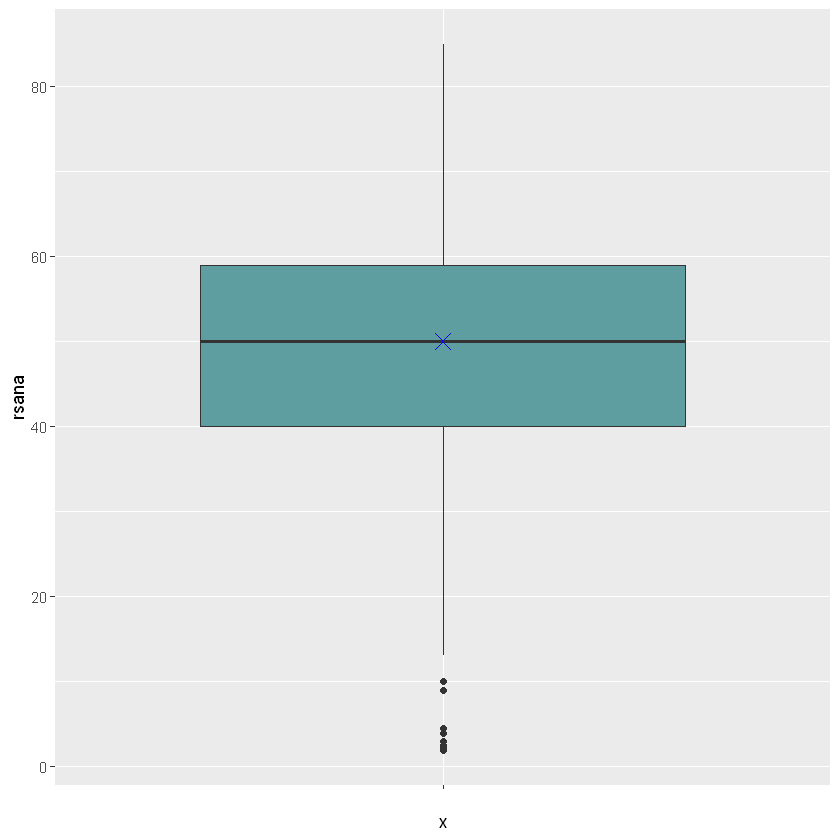

In [20]:
ggplot(NO3.N02.GrandEst.2021, aes(x = "", y = rsana)) +
  geom_boxplot(fill = "cadetblue") +
  geom_point(stat = "summary", fun = "median", color = "blue", shape = 4, size = 4)  # Ajouter la médiane en bleu
  geom_point(stat = "summary", fun = "mean", color = "yellow", shape = 2, size = 4)  # Ajouter la moyenne en jaune
  labs(title = "Distribution de nitrate dans l'eau dans le Grand-Est",
       y = "Niveau de nitrate (mg/L)",
       x = "") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  # Centrer le titre du graphique



- <span style="color:steelblue">Distribution des niveaux de nitrate par département dans le Grand-Est</span>

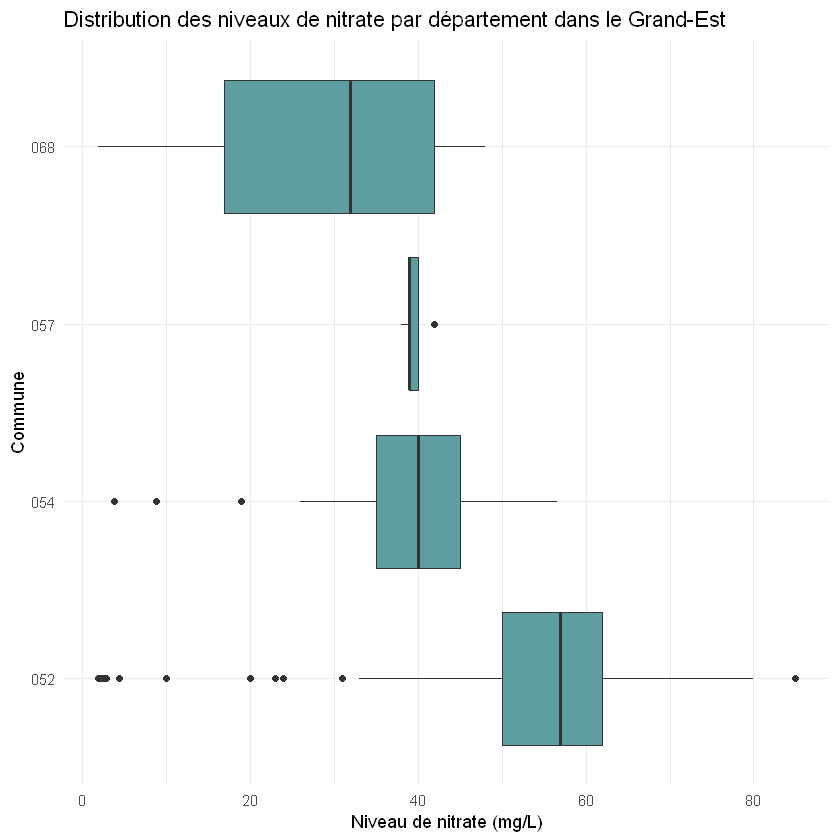

In [21]:
ggplot(NO3.N02.GrandEst.2021, aes(x = cddept.x, y = rsana)) +
  geom_boxplot(fill = "cadetblue") +
  labs(title = "Distribution des niveaux de nitrate par département dans le Grand-Est",
       y = "Niveau de nitrate (mg/L)",
       x = "Commune") +
   theme_minimal() +
   coord_flip()

- <span style="color:steelblue">Distribution des niveaux de nitrate par commune dans le Grand-Est</span>

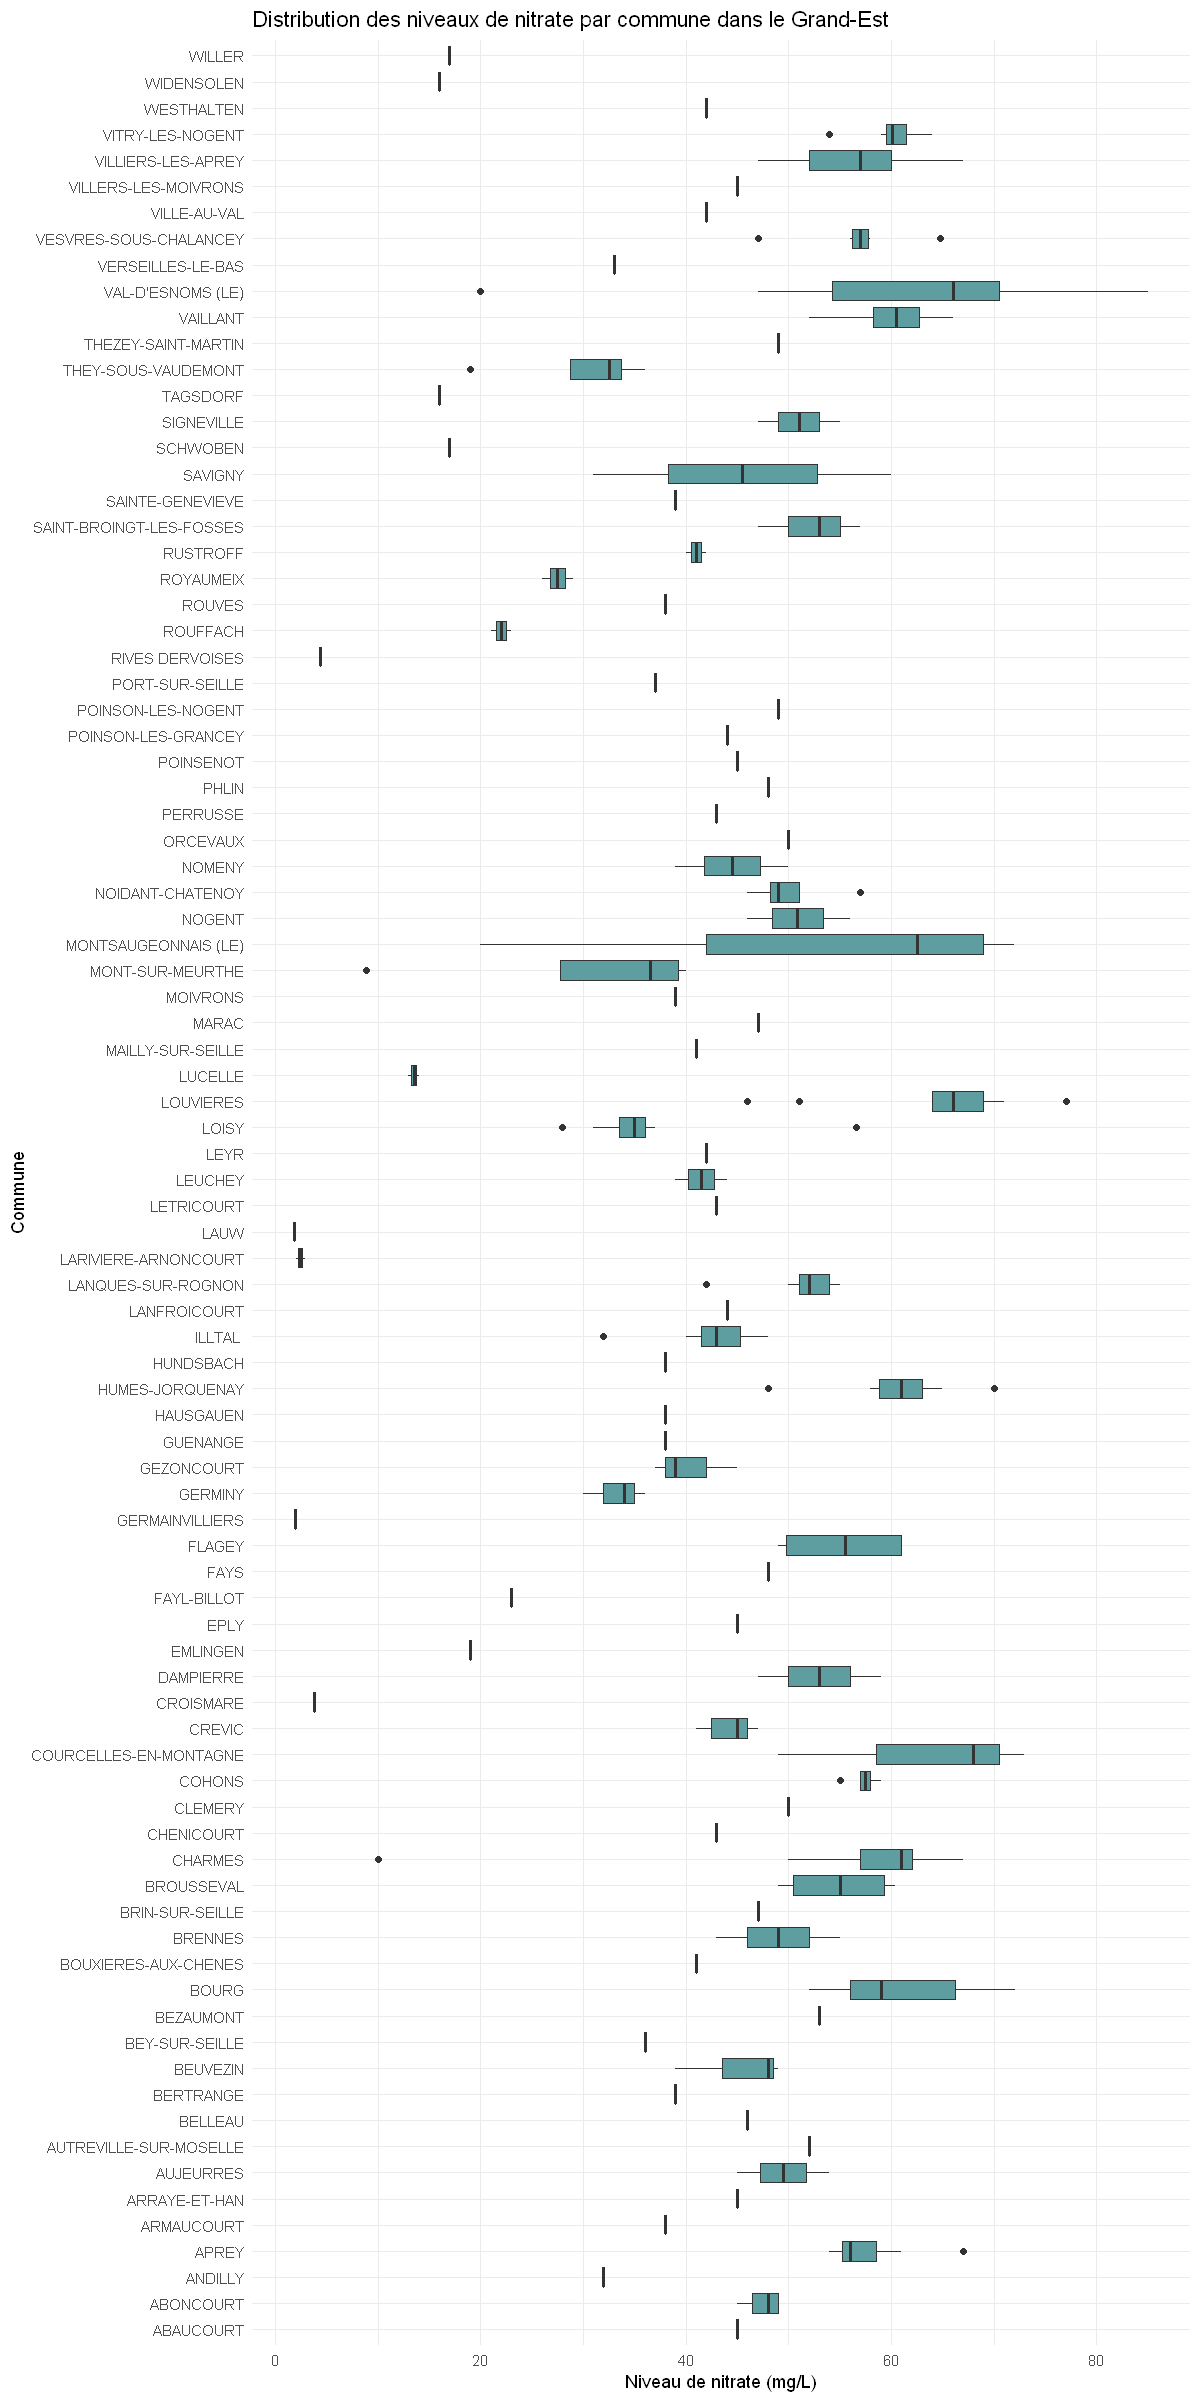

In [22]:
options(repr.plot.width=10, repr.plot.height=20)
ggplot(NO3.N02.GrandEst.2021, aes(x = nomcommune, y = rsana)) +
  geom_boxplot(fill = "cadetblue") +
  labs(title = "Distribution des niveaux de nitrate par commune dans le Grand-Est",
       y = "Niveau de nitrate (mg/L)",
       x = "Commune") +
   theme_minimal() +
   coord_flip()


- <span style="color:steelblue">Distribution nitrate dans l'eau dans le Grand-Est avec une carte</span>

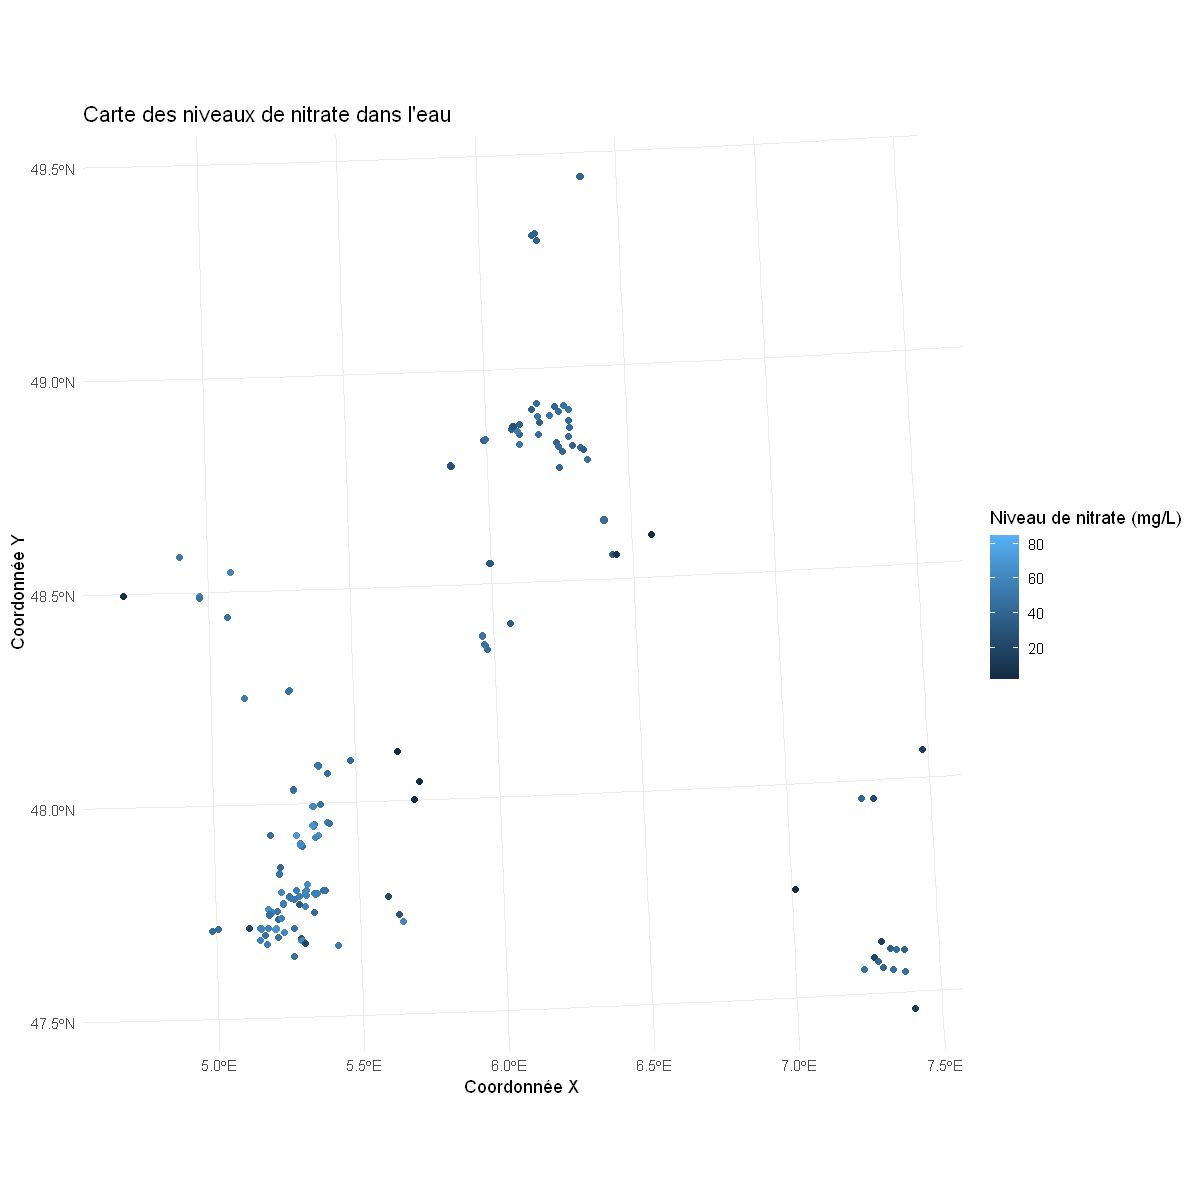

In [28]:
ggplot() +
  geom_point(data = NO3.N02.GrandEst.2021, aes(x = coord_x, y = coord_y, color = rsana)) +
  coord_sf(crs = st_crs(2154)) +  # Utilisation de st_crs() avec l'ID EPSG directement
  labs(title = "Carte des niveaux de nitrate dans l'eau",
       x = "Coordonnée X",
       y = "Coordonnée Y",
       color = "Niveau de nitrate (mg/L)") +
  theme_minimal()


- <span style="color:indianred">Piste de réflexion à venir? Utiliser des techniques de modélisation statistique, telles que la régression linéaire ou la régression logistique, pour étudier la relation entre les caractéristiques du réseau de distribution d'eau (par exemple, la distance des points de distribution d'eau, la qualité de l'eau) et les niveaux de nitrate dans l'eau</span>
- <span style="color:indianred">Utiliser des techniques d'analyse spatiale, telles que l'interpolation spatiale ou la modélisation géostatistique, pour étudier la relation entre le lieu d'habitation des gens et les niveaux de nitrate dans l'eau. Vous pouvez également utiliser des méthodes de regroupement spatial pour identifier les clusters de personnes exposées à des niveaux de nitrate élevés.</span>
- <span style="color:indianred">Créer des visualisations pour communiquer les résultats de manière claire et efficace aux parties prenantes et aux décideurs.</span>